# Route Analysis: Identifying Southwest's Top 5 Domestic Routes

This notebook identifies Southwest Airlines' busiest domestic routes based on passenger volume from **January 2020 to June 2025**.

**Objective:**  
Determine the top 5 routes to focus our **On-Time Performance (OTP)** vs. **Load Factor** analysis.

---

## Import Libraries and Setup


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

from src import DataCleaner

# Set display options
pd.set_option('display.max_columns', None)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# %matplotlib inline

---


### Cell 1. Load Cleaned Data

In [2]:
# Load cleaned Southwest data from previous notebook
lf_clean = pd.read_csv('../data/processed/lf_clean_southwest.csv')
otp_clean = pd.read_csv('../data/processed/otp_clean_southwest.csv')

# Convert DATE columns to datetime
lf_clean['DATE'] = pd.to_datetime(lf_clean['DATE'])
otp_clean['DATE'] = pd.to_datetime(otp_clean['DATE'])

print(f"Load Factor records: {len(lf_clean):,}")
print(f"OTP records: {len(otp_clean):,}")

/tmp/ipykernel_12601/564033055.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  otp_clean = pd.read_csv('../data/processed/otp_clean_southwest.csv')


Load Factor records: 249,691
OTP records: 6,878,676


---


### Cell 2. Identify Top Routes by Total Passengers


Top 5 routes by PASSENGERS:
1. DEN-PHX: 5,081,022 passengers
2. SAN-SMF: 4,647,018 passengers
3. DAL-HOU: 4,407,845 passengers
4. BWI-MCO: 4,264,633 passengers
5. SAN-SJC: 4,194,826 passengers

Top 10 Routes - Detailed Statistics:
         Total_Passengers  Total_Seats  Total_Flights First_Date  Last_Date  \
ROUTE                                                                         
DEN-PHX         5081022.0    6667567.0        41569.0 2020-01-01 2025-06-01   
SAN-SMF         4647018.0    6218546.0        40718.0 2020-01-01 2025-06-01   
DAL-HOU         4407845.0    6418869.0        41691.0 2020-01-01 2025-06-01   
BWI-MCO         4264633.0    5765725.0        36211.0 2020-01-01 2025-06-01   
SAN-SJC         4194826.0    6040775.0        39721.0 2020-01-01 2025-06-01   
DEN-LAS         4170981.0    5739745.0        35887.0 2020-01-01 2025-06-01   
LAS-SAN         4124185.0    5696624.0        36464.0 2020-01-01 2025-06-01   
LAS-PHX         3913622.0    5469207.0        34649.0 202

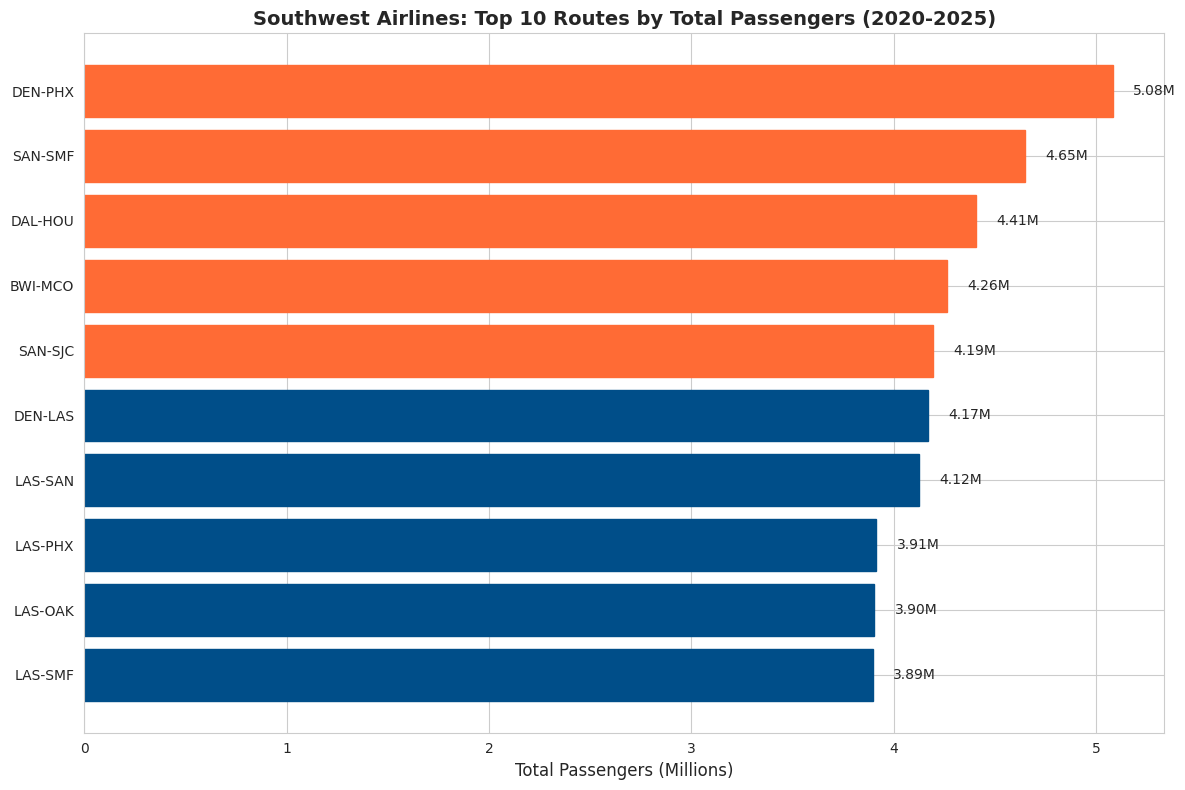

In [3]:
# Use DataCleaner to get top 5 routes
cleaner = DataCleaner(carrier_code='WN')
top_5_routes = cleaner.get_top_routes(lf_clean, n=5, metric='PASSENGERS')


# Get detailed statistics for top 5 routes
route_stats = lf_clean.groupby('ROUTE').agg({
    'PASSENGERS': 'sum',
    'SEATS': 'sum',
    'DEPARTURES_PERFORMED': 'sum',
    'DATE': ['min', 'max']
}).round(0)

route_stats.columns = ['Total_Passengers', 'Total_Seats', 'Total_Flights', 'First_Date', 'Last_Date']
route_stats['Load_Factor'] = (route_stats['Total_Passengers'] / route_stats['Total_Seats'] * 100).round(2)
route_stats = route_stats.sort_values('Total_Passengers', ascending=False)

print("\nTop 10 Routes - Detailed Statistics:")
print(route_stats.head(10))


# Visualize top 10 routes by passengers
top_10_stats = route_stats.head(10)

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(top_10_stats)), top_10_stats['Total_Passengers'] / 1e6)
ax.set_yticks(range(len(top_10_stats)))
ax.set_yticklabels(top_10_stats.index)
ax.set_xlabel('Total Passengers (Millions)', fontsize=12)
ax.set_title('Southwest Airlines: Top 10 Routes by Total Passengers (2020-2025)', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()

# Add value labels
for i, (idx, row) in enumerate(top_10_stats.iterrows()):
    ax.text(row['Total_Passengers'] / 1e6 + 0.1, i, 
            f"{row['Total_Passengers']/1e6:.2f}M", 
            va='center', fontsize=10)

# Color top 5 differently
for i in range(5):
    bars[i].set_color('#FF6B35')
for i in range(5, 10):
    bars[i].set_color('#004E89')

plt.tight_layout()
plt.show()

---


### Cell 3. Examine Top 5 Routes in Detail

In [4]:
# Get airport city names for context
airport_names = {
    'DEN': 'Denver', 'PHX': 'Phoenix', 'MDW': 'Chicago (Midway)', 
    'LAS': 'Las Vegas', 'BWI': 'Baltimore', 'DAL': 'Dallas (Love Field)',
    'HOU': 'Houston (Hobby)', 'LAX': 'Los Angeles', 'SAN': 'San Diego',
    'MCO': 'Orlando', 'ATL': 'Atlanta', 'OAK': 'Oakland', 'SMF': 'Sacramento'
}

print("\n" + "="*80)
print("TOP 5 SOUTHWEST ROUTES BY PASSENGER VOLUME (2020-2025)")
print("="*80)

for i, route in enumerate(top_5_routes, 1):
    route_data = route_stats.loc[route]
    airports = route.split('-')
    
    # Get city names
    city1 = airport_names.get(airports[0], airports[0])
    city2 = airport_names.get(airports[1], airports[1])
    
    print(f"\n{i}. {route}: {city1} ↔ {city2}")
    print(f"   Total Passengers: {route_data['Total_Passengers']:,.0f}")
    print(f"   Total Flights: {route_data['Total_Flights']:,.0f}")
    print(f"   Average Load Factor: {route_data['Load_Factor']:.2f}%")
    print(f"   Date Range: {route_data['First_Date']} to {route_data['Last_Date']}")


TOP 5 SOUTHWEST ROUTES BY PASSENGER VOLUME (2020-2025)

1. DEN-PHX: Denver ↔ Phoenix
   Total Passengers: 5,081,022
   Total Flights: 41,569
   Average Load Factor: 76.21%
   Date Range: 2020-01-01 00:00:00 to 2025-06-01 00:00:00

2. SAN-SMF: San Diego ↔ Sacramento
   Total Passengers: 4,647,018
   Total Flights: 40,718
   Average Load Factor: 74.73%
   Date Range: 2020-01-01 00:00:00 to 2025-06-01 00:00:00

3. DAL-HOU: Dallas (Love Field) ↔ Houston (Hobby)
   Total Passengers: 4,407,845
   Total Flights: 41,691
   Average Load Factor: 68.67%
   Date Range: 2020-01-01 00:00:00 to 2025-06-01 00:00:00

4. BWI-MCO: Baltimore ↔ Orlando
   Total Passengers: 4,264,633
   Total Flights: 36,211
   Average Load Factor: 73.97%
   Date Range: 2020-01-01 00:00:00 to 2025-06-01 00:00:00

5. SAN-SJC: San Diego ↔ SJC
   Total Passengers: 4,194,826
   Total Flights: 39,721
   Average Load Factor: 69.44%
   Date Range: 2020-01-01 00:00:00 to 2025-06-01 00:00:00


---


### Cell 4. Monthly Trends for Top 5 Routes

Load Factor records for top 5 routes: 1,860
OTP records for top 5 routes: 204,767


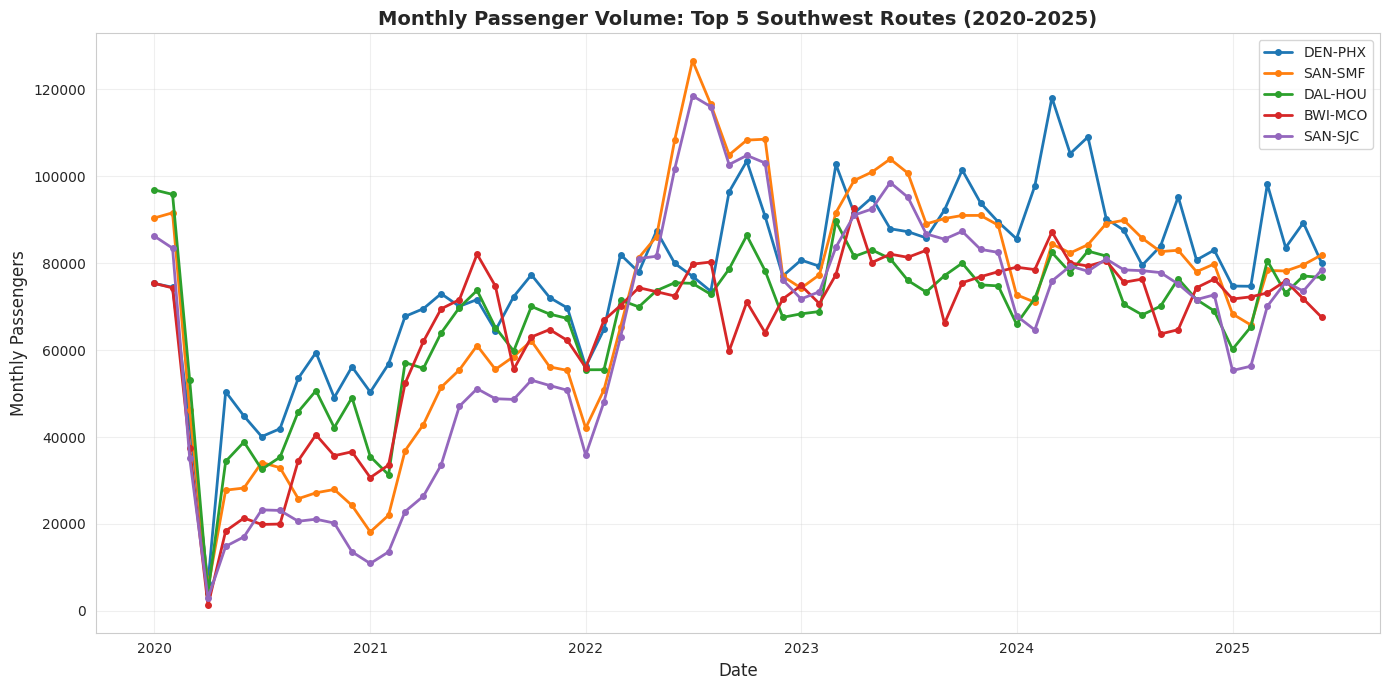

/tmp/ipykernel_12601/2007076772.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_lf = lf_top5.groupby(['ROUTE', 'DATE']).apply(


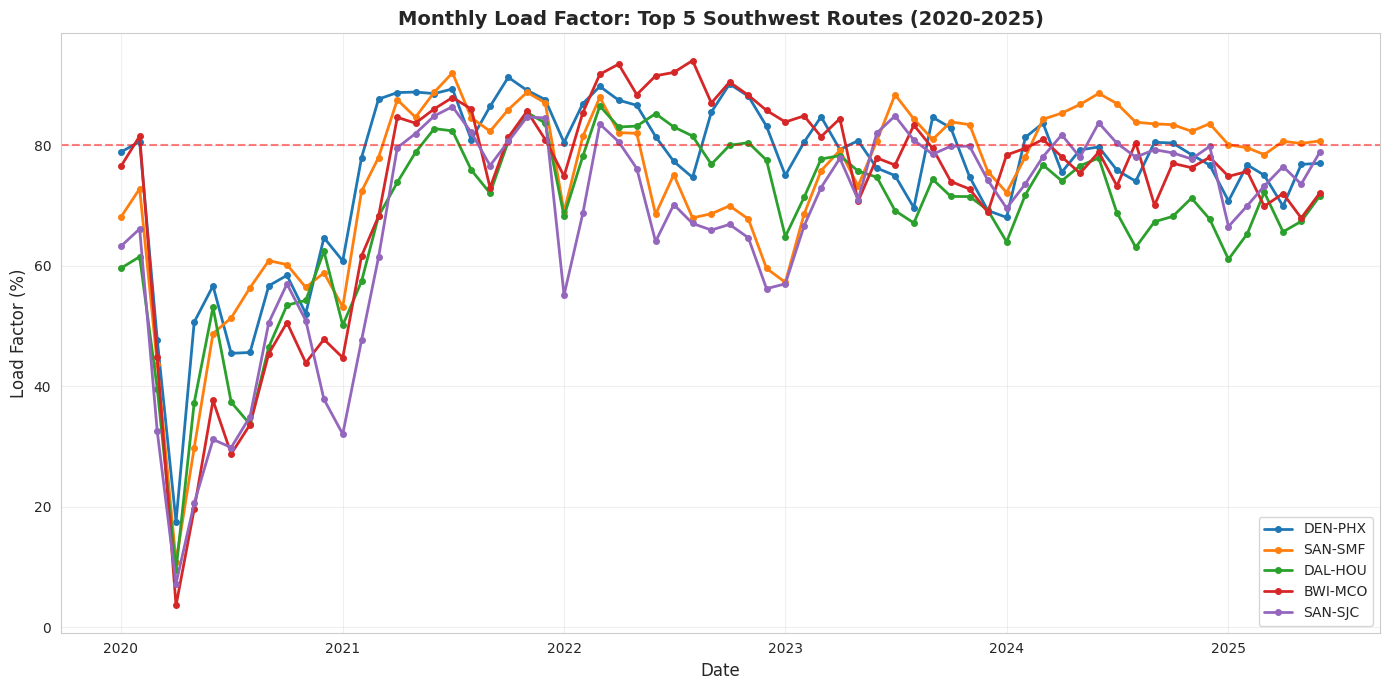

In [5]:
# Filter data for top 5 routes
lf_top5 = lf_clean[lf_clean['ROUTE'].isin(top_5_routes)].copy()
otp_top5 = otp_clean[otp_clean['ROUTE'].isin(top_5_routes)].copy()

print(f"Load Factor records for top 5 routes: {len(lf_top5):,}")
print(f"OTP records for top 5 routes: {len(otp_top5):,}")


# Calculate monthly passengers for each route
monthly_passengers = lf_top5.groupby(['ROUTE', 'DATE'])['PASSENGERS'].sum().reset_index()

# Plot monthly passenger trends
fig, ax = plt.subplots(figsize=(14, 7))

for route in top_5_routes:
    route_data = monthly_passengers[monthly_passengers['ROUTE'] == route]
    ax.plot(route_data['DATE'], route_data['PASSENGERS'], 
            marker='o', label=route, linewidth=2, markersize=4)

ax.set_title('Monthly Passenger Volume: Top 5 Southwest Routes (2020-2025)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Monthly Passengers', fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Calculate monthly load factor for each route
monthly_lf = lf_top5.groupby(['ROUTE', 'DATE']).apply(
    lambda x: (x['PASSENGERS'].sum() / x['SEATS'].sum() * 100)
).reset_index()
monthly_lf.columns = ['ROUTE', 'DATE', 'LOAD_FACTOR']

# Plot monthly load factor trends
fig, ax = plt.subplots(figsize=(14, 7))

for route in top_5_routes:
    route_data = monthly_lf[monthly_lf['ROUTE'] == route]
    ax.plot(route_data['DATE'], route_data['LOAD_FACTOR'], 
            marker='o', label=route, linewidth=2, markersize=4)

ax.set_title('Monthly Load Factor: Top 5 Southwest Routes (2020-2025)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Load Factor (%)', fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
ax.axhline(y=80, color='red', linestyle='--', alpha=0.5, label='80% threshold')
plt.tight_layout()
plt.show()

---


### Cell 5. Check Data Availability for Both Datasets

In [6]:
# Check which routes have data in both datasets
lf_routes = set(lf_top5['ROUTE'].unique())
otp_routes = set(otp_top5['ROUTE'].unique())

print("Routes in Load Factor data:", lf_routes)
print("Routes in OTP data:", otp_routes)
print("\nRoutes in BOTH datasets:", lf_routes.intersection(otp_routes))
print("Routes ONLY in Load Factor:", lf_routes - otp_routes)
print("Routes ONLY in OTP:", otp_routes - lf_routes)


# Check date coverage for each route
print("\nDate Coverage by Route:")
print("="*80)

for route in top_5_routes:
    lf_route = lf_top5[lf_top5['ROUTE'] == route]
    otp_route = otp_top5[otp_top5['ROUTE'] == route]
    
    print(f"\n{route}:")
    print(f"  Load Factor: {lf_route['DATE'].min()} to {lf_route['DATE'].max()} "
          f"({len(lf_route['DATE'].unique())} months)")
    print(f"  OTP:         {otp_route['DATE'].min()} to {otp_route['DATE'].max()} "
          f"({len(otp_route['DATE'].unique())} months)")

Routes in Load Factor data: {'SAN-SMF', 'SAN-SJC', 'DAL-HOU', 'BWI-MCO', 'DEN-PHX'}
Routes in OTP data: {'SAN-SMF', 'SAN-SJC', 'DAL-HOU', 'BWI-MCO', 'DEN-PHX'}

Routes in BOTH datasets: {'SAN-SMF', 'SAN-SJC', 'DAL-HOU', 'BWI-MCO', 'DEN-PHX'}
Routes ONLY in Load Factor: set()
Routes ONLY in OTP: set()

Date Coverage by Route:

DEN-PHX:
  Load Factor: 2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)
  OTP:         2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)

SAN-SMF:
  Load Factor: 2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)
  OTP:         2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)

DAL-HOU:
  Load Factor: 2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)
  OTP:         2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)

BWI-MCO:
  Load Factor: 2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)
  OTP:         2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 months)

SAN-SJC:
  Load Factor: 2020-01-01 00:00:00 to 2025-06-01 00:00:00 (66 m

---


### Cell 6. Save Top 5 Routes Data

In [7]:
# Save filtered data for top 5 routes
lf_top5.to_csv('../data/processed/lf_top5_routes.csv', index=False)
otp_top5.to_csv('../data/processed/otp_top5_routes.csv', index=False)

# Save route list
pd.DataFrame({'ROUTE': top_5_routes}).to_csv('../data/processed/top5_routes.csv', index=False)

print("\nTop 5 routes data saved to data/processed/")
print(f"Routes saved: {', '.join(top_5_routes)}")


Top 5 routes data saved to data/processed/
Routes saved: DEN-PHX, SAN-SMF, DAL-HOU, BWI-MCO, SAN-SJC


---


## Summary

**Top 5 Southwest Domestic Routes**  
*(by passenger volume, 2020–2025)*

These routes have been selected for further analysis to examine the relationship between **load factor** and **on-time performance (OTP)**.

---

**Next Steps:**

- Merge load factor and OTP data by route and month  
- Calculate correlations between load factor and OTP metrics  
- Visualize relationships and identify patterns


---


### Please refer to Notebook 3, now.